In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path="/content/drive/MyDrive/cdac assignment/project/dataset/TravelInsurancePrediction.csv"
df=pd.read_csv(file_path,index_col = 0)

**Pre Processing**

In [ ]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df.shape

(1987, 9)

In [ ]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

**Descriptive Analysis**

In [ ]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [ ]:
df.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

In [ ]:
df.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

**Observations:**
*   In this dataset no column has na values
*    Also no column has only one unique value. So no need to drop any column.



**Total columns = 9**

*    6 categorical columns :Employment Type, GraduateOrNot, ChronicDiseases,    FrequentFlyer, EverTravelledAbroad, TravelInsurance.

*   3 continuous columns :Age, AnnualIncome, FamilyMembers.   
    
        


In [ ]:
column_object=df.select_dtypes(include='object').columns
column_object

Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')

In [ ]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


**Outlier Detection**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd205b5df60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd205b5e4a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd205b5dcc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd205b5e9e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd205b5ec80>],
 'means': []}

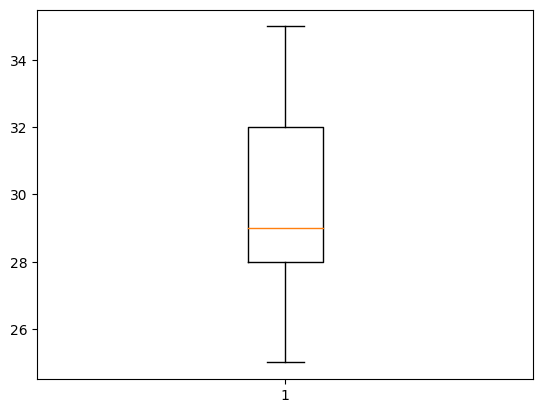

In [ ]:
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd205a74b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd205a75090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd205a748b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd205a755d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd205a75870>],
 'means': []}

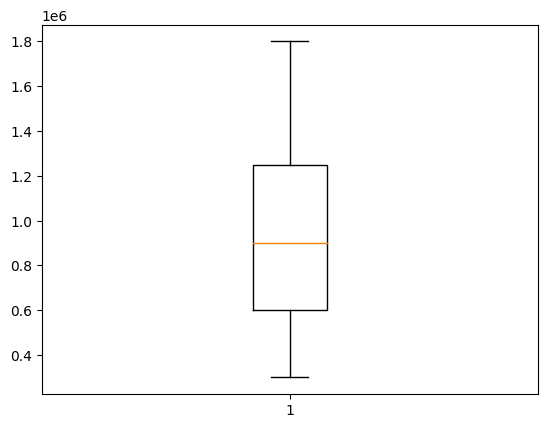

In [ ]:
plt.boxplot(df['AnnualIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd2038f09d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd2038f0f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd2038f0730>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd2038f1450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2038f16f0>],
 'means': []}

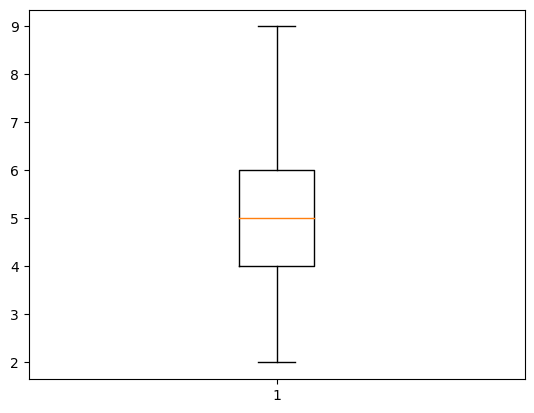

In [ ]:
plt.boxplot(df['FamilyMembers'])

In [ ]:
numeric_columns = ['Age','AnnualIncome','FamilyMembers']

In [ ]:
df_new=df.copy()

In [ ]:
def outlier_imputation_IQR(df,col):
    q1, q3 = df[col].quantile([0.25,0.75])
    iqr = q3 -q1

    df.loc[df[col] < (q1-1.5*iqr),col ] = (q1-1.5*iqr)
    df.loc[df[col] > (q3+1.5*iqr),col ] = (q3+1.5*iqr)
    return df

for col in numeric_columns:
    df_new = outlier_imputation_IQR(df_new,col)


In [ ]:
df_new.loc[:,numeric_columns].describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


In [ ]:
df_new.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


**Observations:**

*   No outliers in Age, AnnualIncome, FamilyMembers columns.


**Correlation Test**

<ipython-input-22-f473e5c5b8b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()# plot the heatmap


<Axes: >

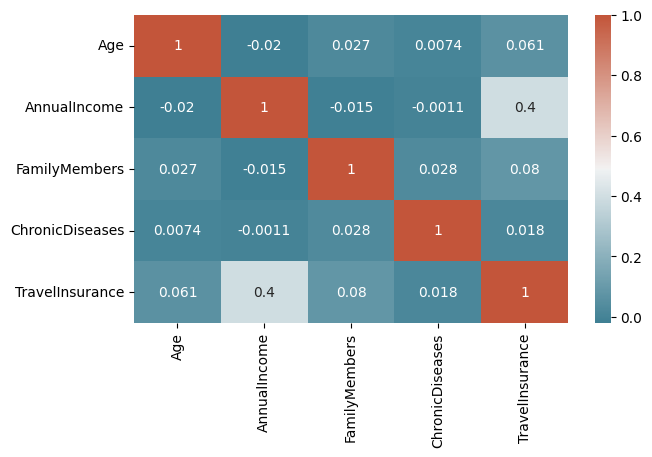

In [ ]:
corr = df.corr()# plot the heatmap
plt.subplots(figsize=(7,4))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


**Observations:**

*   columns are not that significantly correlated to eachother.
*   so no need to drop any column
    


**Split dataset into x and y**

*   Target variable y is TravelInsurance
*   Except TravelInsurance column all remaining are independent features  
    


In [ ]:
x = df.drop('TravelInsurance',axis = 1)
y = df['TravelInsurance']

In [ ]:
x.shape,y.shape

((1987, 8), (1987,))

In [ ]:
x.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,Government Sector,Yes,400000,6,1,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

In [ ]:
x.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
dtype: object

**Standardizing the x**

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(x[numeric_columns])
x[numeric_columns]=std.transform(x[numeric_columns])
x.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.463430,Government Sector,Yes,-1.414061,0.774964,1,No,No
1,0.463430,Private Sector/Self Employed,Yes,0.842012,1.396373,0,No,No
2,1.493446,Private Sector/Self Employed,Yes,-1.148641,-0.467855,1,No,No
3,-0.566587,Private Sector/Self Employed,Yes,-0.617800,-1.089265,1,No,No
4,-0.566587,Private Sector/Self Employed,Yes,-0.617800,2.017783,1,Yes,No


**One hot encoding, label encoding**

*   label encoding: GraduateOrNot, FrequentFlyer, EverTravelledAbroad
*   One hot encoding: Employment Type



In [ ]:
x.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.463430,Government Sector,Yes,-1.414061,0.774964,1,No,No
1,0.463430,Private Sector/Self Employed,Yes,0.842012,1.396373,0,No,No
2,1.493446,Private Sector/Self Employed,Yes,-1.148641,-0.467855,1,No,No
3,-0.566587,Private Sector/Self Employed,Yes,-0.617800,-1.089265,1,No,No
4,-0.566587,Private Sector/Self Employed,Yes,-0.617800,2.017783,1,Yes,No


In [ ]:
x['GraduateOrNot'].replace({'Yes': 1, 'No': 0}, inplace=True)
x['FrequentFlyer'].replace({'Yes': 1, 'No': 0}, inplace=True)
x['EverTravelledAbroad'].replace({'Yes': 1, 'No': 0}, inplace=True)

In [ ]:
x.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,0.463430,Government Sector,1,-1.414061,0.774964,1,0,0
1,0.463430,Private Sector/Self Employed,1,0.842012,1.396373,0,0,0
2,1.493446,Private Sector/Self Employed,1,-1.148641,-0.467855,1,0,0
3,-0.566587,Private Sector/Self Employed,1,-0.617800,-1.089265,1,0,0
4,-0.566587,Private Sector/Self Employed,1,-0.617800,2.017783,1,1,0


In [ ]:
x.dtypes

Age                    float64
Employment Type         object
GraduateOrNot            int64
AnnualIncome           float64
FamilyMembers          float64
ChronicDiseases          int64
FrequentFlyer            int64
EverTravelledAbroad      int64
dtype: object

In [ ]:
x.shape

(1987, 8)

In [ ]:
x = pd.get_dummies(x)

In [ ]:
x.shape

(1987, 9)

In [ ]:
x.head()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed
0,0.463430,1,-1.414061,0.774964,1,0,0,1,0
1,0.463430,1,0.842012,1.396373,0,0,0,0,1
2,1.493446,1,-1.148641,-0.467855,1,0,0,0,1
3,-0.566587,1,-0.617800,-1.089265,1,0,0,0,1
4,-0.566587,1,-0.617800,2.017783,1,1,0,0,1


**Splitting the data into x_train, x_test, y_train, y_test**

In [ ]:
df.loc[:,['TravelInsurance']].value_counts(normalize=True)

TravelInsurance
0                  0.642677
1                  0.357323
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 7,stratify = y)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1390, 9), (597, 9), (1390,), (597,))

# **Logistic Regression**

We are using Gridsearch technique to fine tune the parameters of the models

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

param_grid = {
    'max_iter' :[x for x in range(5,50,5)],
    'C' :[x/10 for x in range(1,11,1)]
}

In [ ]:
gscv = GridSearchCV(LogisticRegression(penalty = 'l2',class_weight = 'balanced',
                                       random_state = 7, solver = 'saga'),
                                       param_grid, cv=5, verbose=0)

In [ ]:
gscv.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=7, solver='saga'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'max_iter': [5, 10, 15, 20, 25, 30, 35, 40, 45]})

In [ ]:
gscv.best_score_

0.737410071942446

In [ ]:
print("The best parameters are: ")

print(gscv.best_params_)

The best parameters are: 
{'C': 0.9, 'max_iter': 10}


In [ ]:
lr = LogisticRegression(penalty = 'l2',class_weight = 'balanced',random_state = 7, solver = 'saga',
                        max_iter = 10,C = 0.9)


In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.9, class_weight='balanced', max_iter=10, random_state=7,
                   solver='saga')

In [ ]:
y_pred_logr = lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_logr)

array([[307,  77],
       [ 87, 126]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logr))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       384
           1       0.62      0.59      0.61       213

    accuracy                           0.73       597
   macro avg       0.70      0.70      0.70       597
weighted avg       0.72      0.73      0.72       597



**Observations:**

*   Accuracy of Logistic regression is 73%




    


# **Support Vector Machine Model**

In [ ]:
from sklearn.svm import SVC
param_grid = {
    "C" : [x/10 for x in range(1,31,1)],
    "gamma" : [x/10 for x in range(1,21,1)]
}

gscv = GridSearchCV(SVC(random_state=7), param_grid, cv=5, verbose=1)
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=SVC(random_state=7),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                               1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0,
                               2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9,
                               3.0],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8,
                                   1.9, 2.0]},
             verbose=1)

In [ ]:
print(gscv.best_score_)
print("The best parameters are: ")
print(gscv.best_params_)

0.8251798561151078
The best parameters are: 
{'C': 0.6, 'gamma': 0.6}


In [ ]:
svc = SVC(C=0.6,gamma = 0.6,random_state=7)

In [ ]:
svc.fit(x_train,y_train)

SVC(C=0.6, gamma=0.6, random_state=7)

In [ ]:
y_pred_svc = svc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       384
           1       0.86      0.60      0.70       213

    accuracy                           0.82       597
   macro avg       0.83      0.77      0.79       597
weighted avg       0.83      0.82      0.81       597



**Observations:**
- Accurcy of SVM is 82%

# **Random Forest model**

In [ ]:
param_grid = {
    'n_estimators': [x for x in range(10,201,10)],
    'max_samples': [x/10 for x in range(1,10,1)]
}

gscv = GridSearchCV(RandomForestClassifier(max_depth = 4,
                                           oob_score=True,
                                           class_weight='balanced',
                                           random_state=7),
                    param_grid, cv=5, verbose=2)

gscv.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END ...................max_samples=0.1, n_estimators=10; total time=   0.0s
[CV] END ...................max_samples=0.1, n_estimators=10; total time=   0.0s
[CV] END ...................max_samples=0.1, n_estimators=10; total time=   0.0s
[CV] END ...................max_samples=0.1, n_estimators=10; total time=   0.0s
[CV] END ...................max_samples=0.1, n_estimators=10; total time=   0.0s
[CV] END ...................max_samples=0.1, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.1, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.1, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.1, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.1, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.1, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.1, n

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

[CV] END ...................max_samples=0.5, n_estimators=10; total time=   0.0s
[CV] END ...................max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END ...................max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END ...................max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END ...................max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END ...................max_samples=0.5, n_estimators=20; total time=   0.1s
[CV] END ...................max_samples=0.5, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.5, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.5, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.5, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.5, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.5, n_estimators=40; total time=   0.2s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

[CV] END ...................max_samples=0.6, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.6, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.6, n_estimators=20; total time=   0.1s
[CV] END ...................max_samples=0.6, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.6, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.6, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.6, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.6, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.6, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.6, n_estimators=40; total time=   0.1s
[CV] END ...................max_samples=0.6, n_estimators=40; total time=   0.1s
[CV] END ...................max_samples=0.6, n_estimators=40; total time=   0.1s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

[CV] END ...................max_samples=0.7, n_estimators=20; total time=   0.1s
[CV] END ...................max_samples=0.7, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.7, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.7, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.7, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.7, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.7, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.7, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.7, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.7, n_estimators=40; total time=   0.1s
[CV] END ...................max_samples=0.7, n_estimators=40; total time=   0.1s
[CV] END ...................max_samples=0.7, n_estimators=40; total time=   0.1s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

[CV] END ...................max_samples=0.8, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.8, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.8, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.8, n_estimators=20; total time=   0.1s
[CV] END ...................max_samples=0.8, n_estimators=30; total time=   0.2s
[CV] END ...................max_samples=0.8, n_estimators=30; total time=   0.3s
[CV] END ...................max_samples=0.8, n_estimators=30; total time=   0.2s
[CV] END ...................max_samples=0.8, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.8, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.8, n_estimators=40; total time=   0.1s
[CV] END ...................max_samples=0.8, n_estimators=40; total time=   0.1s
[CV] END ...................max_samples=0.8, n_estimators=40; total time=   0.1s
[CV] END ...................

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

[CV] END ...................max_samples=0.9, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.9, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.9, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.9, n_estimators=20; total time=   0.0s
[CV] END ...................max_samples=0.9, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.9, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.9, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.9, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.9, n_estimators=30; total time=   0.1s
[CV] END ...................max_samples=0.9, n_estimators=40; total time=   0.1s
[CV] END ...................max_samples=0.9, n_estimators=40; total time=   0.1s
[CV] END ...................max_samples=0.9, n_estimators=40; total time=   0.1s
[CV] END ...................

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=4, oob_score=True,
                                              random_state=7),
             param_grid={'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                         0.9],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200]},
             verbose=2)

In [ ]:
print(gscv.best_score_)
print("The best parameters are:")
print(gscv.best_params_)

0.8338129496402878
The best parameters are:
{'max_samples': 0.7, 'n_estimators': 50}


In [ ]:
rfc = RandomForestClassifier(max_depth = 4,max_samples=0.7, n_estimators= 50,
                       oob_score=True,class_weight='balanced',random_state=7)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, max_samples=0.7,
                       n_estimators=50, oob_score=True, random_state=7)

In [ ]:
y_pred_rfc = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       384
           1       0.90      0.61      0.73       213

    accuracy                           0.84       597
   macro avg       0.86      0.79      0.80       597
weighted avg       0.84      0.84      0.83       597



**Observations**
- accuracy of random forest classifier is 84%

**Conclusion**

Among the three classifiers i.e.logistic regression, support vector machine
and random forestConclusion
maximum accuracy is of **random forest model (84%)**

# **Prediction**

whether a customer will buy a travel insurance or not

In [ ]:
combined_df = pd.concat([x_test, y_test], axis=1)
combined_df.head()

In [ ]:
df_pred=combined_df[combined_df['TravelInsurance'] == 1].sample()

In [ ]:
df_pred=combined_df.sample(1)

In [ ]:
# df_pred

In [ ]:
df_pred_input=df_pred.drop('TravelInsurance',axis = 1)
df_pred_output=df_pred['TravelInsurance']

In [ ]:
df_pred_rfc = rfc.predict(df_pred_input)

In [ ]:
for i in df_pred_output:
  if i==1:
    print("Yes, Customer will buy Travel Insurance")
  else:
    print("No, Customer wont buy Travel Insurance ")

Yes, Customer will buy Travel Insurance
